In [28]:
import sys 
assert sys.version_info>=(3,7)

In [29]:
from packaging import version 
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [31]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [32]:
import numpy as np
np.random.seed(42)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Load the data
data = pd.read_csv('daten.csv', delimiter=';')
data.head()  # Display the first few ro

,date,steps,distance,calories,heart_rate
0,27.04.2016,4948,3242,281,74
1,28.04.2016,16573,12060,751,72
2,29.04.2016,18002,12916,737,75
3,30.04.2016,4126,2981,207,73
4,01.05.2016,3869,2651,244,70


In [52]:
import pandas as pd

# Load the data with semicolon as the delimiter
data = pd.read_csv("daten.csv", delimiter=';')  # Adjusted delimiter
# Check the columns to ensure data is loaded correctly
print(data.columns)

Index(['date', 'steps', 'distance', 'calories', 'heart_rate'], dtype='object')


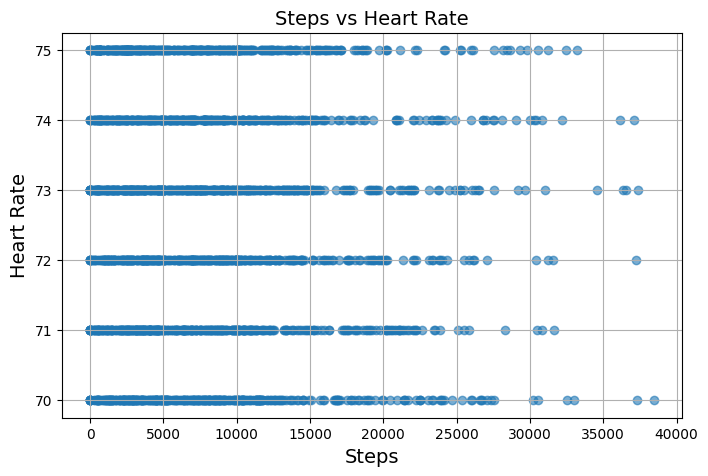

Predicted heart rate for 10,000 steps: [72.50348472]


In [89]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Steps vs Heart Rate
X_steps = data[["steps"]].values
y_heart_rate = data["heart_rate"].values

# Scatter plot for Steps vs Heart Rate
plt.figure(figsize=(8, 5))
plt.scatter(data["steps"], data["heart_rate"], alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Heart Rate")
plt.title("Steps vs Heart Rate")
plt.grid(True)
plt.show()

# Train and predict using Linear Regression for Steps vs Heart Rate
model_steps = LinearRegression()
model_steps.fit(X_steps, y_heart_rate)
X_new_steps = [[10000]]  # Example step count
print("Predicted heart rate for 10,000 steps:", model_steps.predict(X_new_steps))

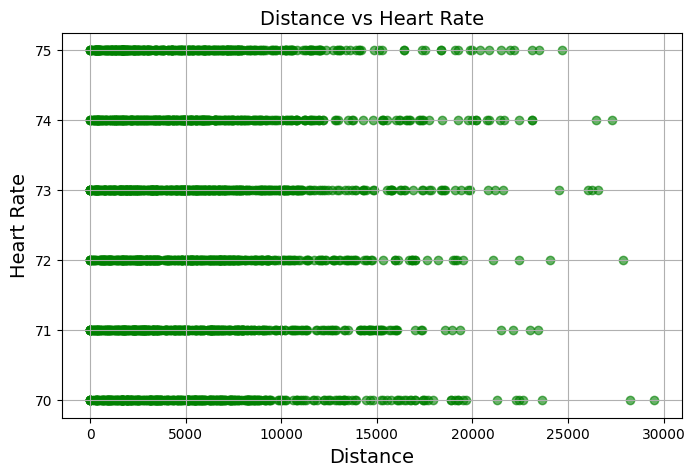

Predicted heart rate for 5,000 distance: [72.52197193]


In [92]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Distance vs Heart Rate
X_distance = data[["distance"]].values
y_heart_rate = data["heart_rate"].values
plt.figure(figsize=(8, 5))
plt.scatter(data["distance"], data["heart_rate"], alpha=0.6, color="green")
plt.xlabel("Distance")
plt.ylabel("Heart Rate")
plt.title("Distance vs Heart Rate")
plt.grid(True)
plt.show()
model_distance = LinearRegression()
model_distance.fit(X_distance, y_heart_rate)
X_new_distance = [[5000]]  # Example distance value
print("Predicted heart rate for 5,000 distance:", model_distance.predict(X_new_distance))

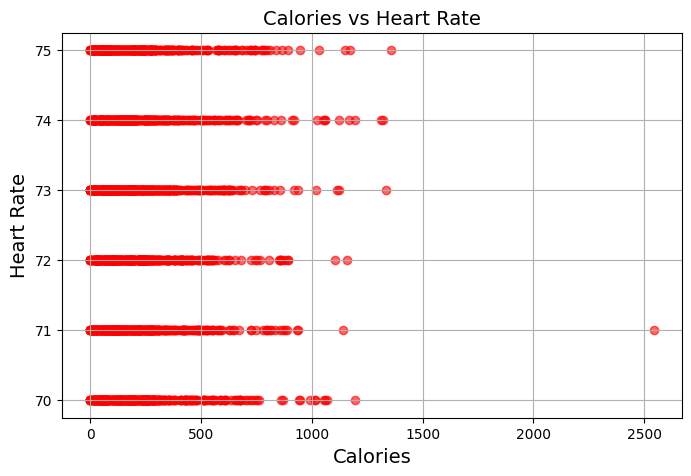

Predicted heart rate for 500 calories burned: [72.49084628]


In [94]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Calories vs Heart Rate
X_calories = data[["calories"]].values
y_heart_rate = data["heart_rate"].values
plt.figure(figsize=(8, 5))
plt.scatter(data["calories"], data["heart_rate"], alpha=0.6, color="red")
plt.xlabel("Calories")
plt.ylabel("Heart Rate")
plt.title("Calories vs Heart Rate")
plt.grid(True)
plt.show()
model_calories = LinearRegression()
model_calories.fit(X_calories, y_heart_rate)
X_new_calories = [[500]]  # Example calories value
print("Predicted heart rate for 500 calories burned:", model_calories.predict(X_new_calories))


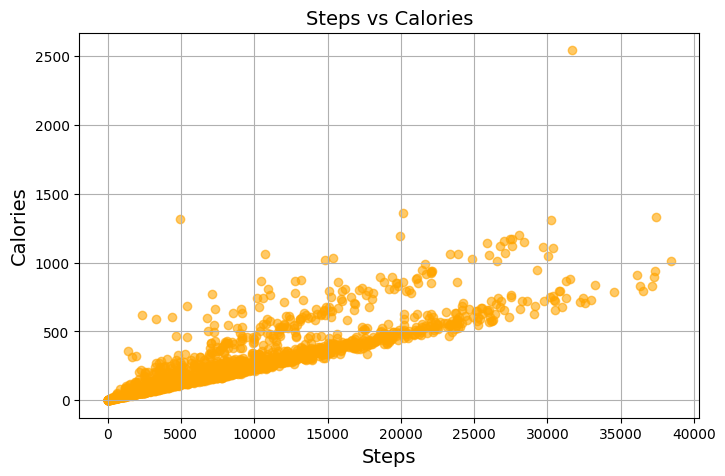

Predicted calories for 10,000 steps: [288.70718879]


In [96]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Steps vs Calories
X_steps = data[["steps"]].values
y_calories = data["calories"].values
plt.figure(figsize=(8, 5))
plt.scatter(data["steps"], data["calories"], alpha=0.6, color="orange")
plt.xlabel("Steps")
plt.ylabel("Calories")
plt.title("Steps vs Calories")
plt.grid(True)
plt.show()
model_steps_calories = LinearRegression()
model_steps_calories.fit(X_steps, y_calories)
X_new_steps = [[10000]]  # Example steps value
print("Predicted calories for 10,000 steps:", model_steps_calories.predict(X_new_steps))


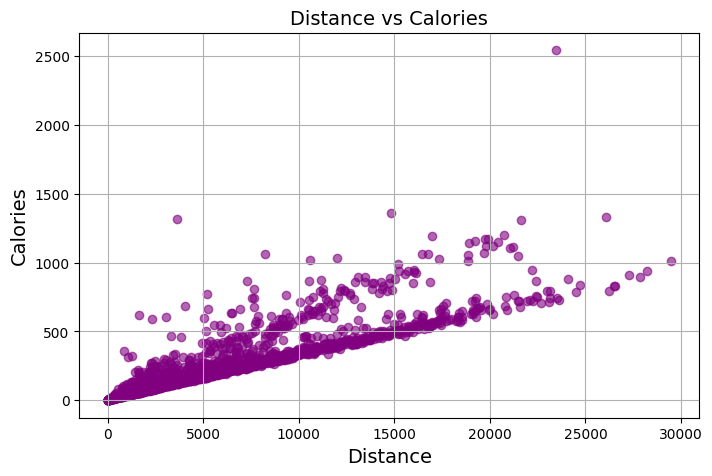

Predicted calories for 5,000 distance: [203.12643769]


In [95]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Distance vs Calories
X_distance = data[["distance"]].values
y_calories = data["calories"].values
plt.figure(figsize=(8, 5))
plt.scatter(data["distance"], data["calories"], alpha=0.6, color="purple")
plt.xlabel("Distance")
plt.ylabel("Calories")
plt.title("Distance vs Calories")
plt.grid(True)
plt.show()
model_distance_calories = LinearRegression()
model_distance_calories.fit(X_distance, y_calories)
X_new_distance = [[5000]]  # Example distance value
print("Predicted calories for 5,000 distance:", model_distance_calories.predict(X_new_distance))


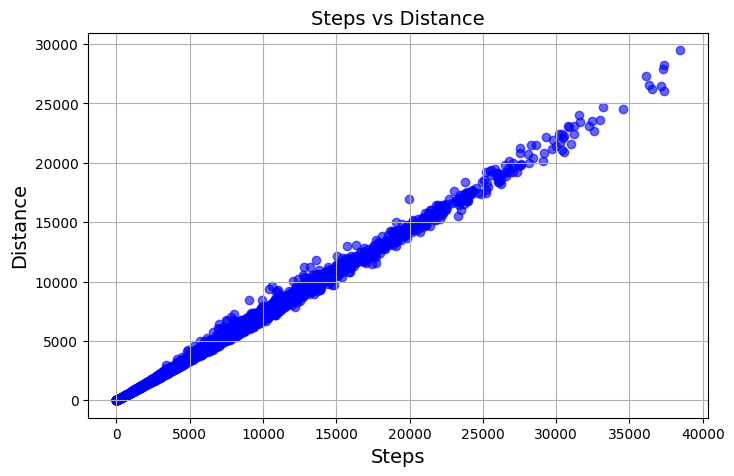

Predicted distance for 10,000 steps: [7222.35373225]


In [109]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Steps vs Distance
X_steps = data[["steps"]].values
y_distance = data["distance"].values
plt.figure(figsize=(8, 5))
plt.scatter(data["steps"], data["distance"], alpha=0.6, color="blue")
plt.xlabel("Steps")
plt.ylabel("Distance")
plt.title("Steps vs Distance")
plt.grid(True)
plt.show()
model_steps_distance = LinearRegression()
model_steps_distance.fit(X_steps, y_distance)
X_new_steps = [[10000]]  # Example steps value
print("Predicted distance for 10,000 steps:", model_steps_distance.predict(X_new_steps))


In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selected feature (Steps and Distance) and target (Heart Rate)
X = data[["steps", "distance"]].values
y = data["heart_rate"].values

# Split the data into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the KNN model with the optimal number of neighbors (12)
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE) for Heart Rate prediction:", rmse)
s
# Function to predict Heart Rate based on Steps and Distance
def predict_heart_rate(steps, distance):
    prediction = knn_model.predict([[steps, distance]])
    return prediction[0]
# Example usage: Predict heart rate for 10,000 steps and 5,000 distance
predicted_heart_rate = predict_heart_rate(10000, 5000)
print("Predicted heart rate for 10,000 steps and 5,000 distance:", predicted_heart_rate)


Root Mean Squared Error (RMSE) for Heart Rate prediction: 1.7610816817367707
Predicted heart rate for 10,000 steps and 5,000 distance: 73.08333333333333


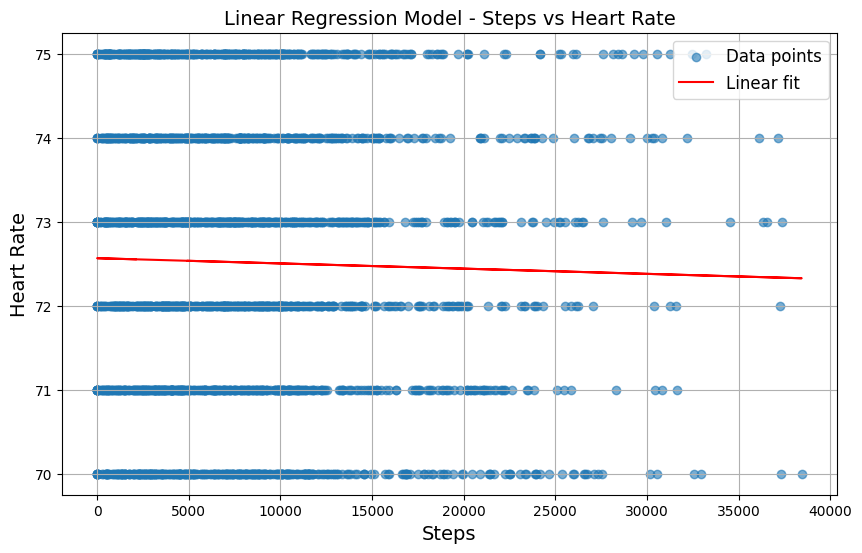

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label="Data points")
plt.plot(X, linear_model.predict(X), color="red", label="Linear fit")
plt.xlabel("Steps")
plt.ylabel("Heart Rate")
plt.title("Linear Regression Model - Steps vs Heart Rate")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [18]:
x = data[["steps"]]
y = data[["heart_rate"]]

In [22]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [21]:
data = pd.read_csv("daten.csv", delimiter=';')
print(data.head())

         date  steps  distance  calories  heart_rate
0  27.04.2016   4948      3242       281          74
1  28.04.2016  16573     12060       751          72
2  29.04.2016  18002     12916       737          75
3  30.04.2016   4126      2981       207          73
4  01.05.2016   3869      2651       244          70


In [27]:
step_to_predict = [[100]]
heart_rate_predication = model.predict(step_to_predict)
print(f"predicated heart rate for 10000 steps:{heart_rate_predication[0]}")

predicated heart rate for 10000 steps:[72.56490872]


c:\Users\safiabdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
